In [ ]:
import pickle
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# import dask.dataframe as dd



     Y_position  Ratio on baseline
0        0.0025            1.00000
1        0.0075            1.04050
2        0.0125            1.00580
3        0.0175            0.99639
4        0.0225            1.05200
..          ...                ...
195      0.9775            1.00720
196      0.9825            1.06360
197      0.9875            1.00290
198      0.9925            1.03540
199      0.9975            1.02100

[200 rows x 2 columns]


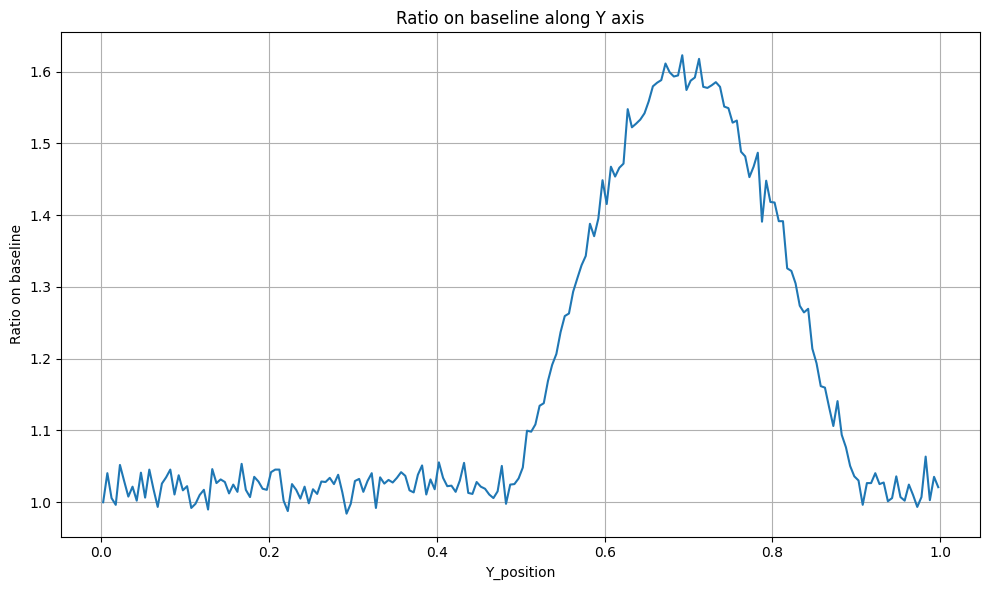

In [4]:
column_names_beta = ["Y_position", "Ratio on baseline", ]
df3 = pd.read_csv('D:\Codes\mc_xyz\mcxyz_22july2019\sampled_data.csv', header=None, names=column_names_beta)
df3['Y_position'] = (df3['Y_position'] + 0.05) * 10

df3 = df3.groupby('Y_position')['Ratio on baseline'].mean().reset_index()
print(df3)

plt.figure(figsize=(10, 6))
plt.plot(df3['Y_position'], df3['Ratio on baseline'])
plt.title("Ratio on baseline along Y axis")
plt.xlabel("Y_position")
plt.ylabel("Ratio on baseline")
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
columns = ['L1 ppath', 'L2 ppath', 'L3 ppath', 'L4 ppath']

data1 = pd.read_csv('D:\Codes\Monte Carlo\\735nm.csv', header=None, names=columns)
data2 = pd.read_csv('D:\Codes\Monte Carlo\\850nm.csv', header=None, names=columns)

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

In [6]:
# L sum
L1_sum1 = df1['L1 ppath'].sum()
L2_sum1 = df1['L2 ppath'].sum()
L3_sum1 = df1['L3 ppath'].sum()
L4_sum1 = df1['L4 ppath'].sum()

Lsum_735 = [L1_sum1, L2_sum1, L3_sum1, L4_sum1]  
print("Lsum_735:",Lsum_735)

L1_sum2 = (df2['L1 ppath'].sum()) 
L2_sum2 = (df2['L2 ppath'].sum()) 
L3_sum2 = (df2['L3 ppath'].sum()) 
L4_sum2 = (df2['L4 ppath'].sum()) 

Lsum_850 = [L1_sum2, L2_sum2, L3_sum2, L4_sum2]  
print("Lsum_850:",Lsum_850)

Lsum_735: [22756356.185209997, 3639896.059162823, 180008.49340625998, 551979.0231433611]
Lsum_850: [22165406.220060002, 3487699.8384394334, 204635.96307954998, 689404.021014835]


In [7]:
#exttinction cofficient under 735/850nm
ex_cofficient = {
    '735nm': [412, 1464],
    '850nm': [1058, 820]
}
index2 = ['EHbO', 'EHb']
ex_co = pd.DataFrame(ex_cofficient, index=index2) # ex_co in cm^-1/M

print(ex_co)
# spo2 calculation reverse process
# spo2 = (ex_co.iloc[1, 0] - (R * ex_co.iloc[1, 1])) / (ex_co.iloc[1, 0] - ex_co.iloc[0, 0] + R * (ex_co.iloc[0, 1] - ex_co.iloc[1, 1]))

def compute_R(spo2):
    global ex_co
    numerator = ex_co.iloc[1, 0] - spo2 * (ex_co.iloc[1, 0] - ex_co.iloc[0, 0])
    denominator = spo2 * (ex_co.iloc[0, 1] - ex_co.iloc[1, 1]) + ex_co.iloc[1, 1]
    R = numerator / denominator
    return R




      735nm  850nm
EHbO    412   1058
EHb    1464    820


In [8]:
# (1) 735nm
# Maternal Abdominal Wall: mu_a=0.0094(mm^-1) mu_s=13.22(mm^-1)
# Maternal Uterus: mu_a=0.016 (mm^-1) mu_s=10.8(mm^-1)
# Amniotic Fluid: mu_a=0.0025 (mm^-1) mu_s=0.1(mm^-1)
# Fetal Tissues: mu_a=0.0187 (mm^-1) mu_s=12.33(mm^-1)

# (1) 850nm
# Maternal Abdominal Wall: mu_a=0.009(mm^-1) mu_s=12(mm^-1)
# Maternal Uterus: mu_a=0.01 (mm^-1) mu_s=8.15(mm^-1)
# Amniotic Fluid: mu_a=0.0042 (mm^-1) mu_s=0.1(mm^-1)
# Fetal Tissues: mu_a=0.013 (mm^-1) mu_s=9.916(mm^-1)


In [9]:
def compute_ratio1(spo2):
    ratio1 = spo2 / (1 - spo2)
    return ratio1


def compute_ratio2(spo2):
    # 计算R
    numerator_R = ex_co.iloc[1, 0] - spo2 * (ex_co.iloc[1, 0] - ex_co.iloc[0, 0])
    denominator_R = spo2 * (ex_co.iloc[0, 1] - ex_co.iloc[1, 1]) + ex_co.iloc[1, 1]
    R = numerator_R / denominator_R
    
    # 计算ratio2
    numerator_ratio2 = R * ex_co.iloc[1, 1] * L2_sum1 - ex_co.iloc[1, 0] * L1_sum1
    denominator_ratio2 = ex_co.iloc[0, 0] * L1_sum1 - R * ex_co.iloc[0, 1] * L2_sum1
    ratio2 = numerator_ratio2 / denominator_ratio2
    
    return ratio2


C:\Users\22877\AppData\Local\Temp\ipykernel_15012\2031551363.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  ratio1 = spo2 / (1 - spo2)


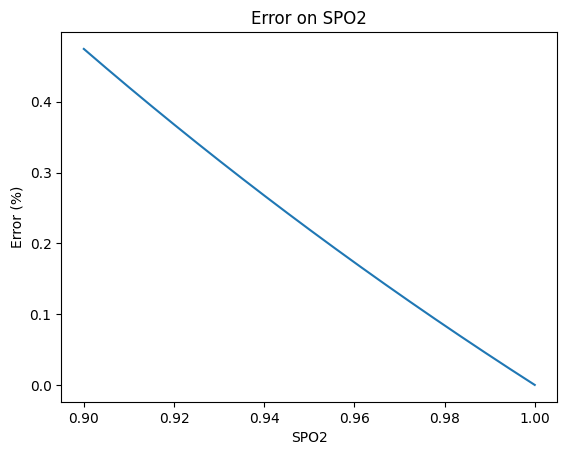

[9.000000000000002, 9.050505050505054, 9.101522842639598, 9.153061224489802, 9.205128205128213, 9.257731958762884, 9.310880829015543, 9.364583333333334, 9.418848167539268, 9.473684210526319, 9.529100529100534, 9.58510638297873, 9.641711229946532, 9.698924731182792, 9.756756756756754, 9.815217391304348, 9.874316939890711, 9.934065934065938, 9.994475138121551, 10.055555555555562, 10.117318435754198, 10.179775280898872, 10.242937853107343, 10.306818181818182, 10.371428571428572, 10.436781609195405, 10.502890173410409, 10.569767441860472, 10.637426900584803, 10.705882352941186, 10.77514792899408, 10.845238095238093, 10.91616766467066, 10.987951807228917, 11.060606060606064, 11.13414634146342, 11.208588957055223, 11.283950617283962, 11.360248447204965, 11.437499999999998, 11.515723270440251, 11.59493670886076, 11.675159235668794, 11.756410256410263, 11.838709677419363, 11.922077922077932, 12.006535947712413, 12.092105263157892, 12.178807947019866, 12.266666666666667, 12.35570469798658, 12.4

In [20]:

spo2_values = np.linspace(0.9, 1, 200)
error_values = []
ratio1_values = []
ratio2_values = []
epsilon = 1e-6

for spo2 in spo2_values:
    ratio1 = compute_ratio1(spo2)
    ratio2 = compute_ratio2(spo2)
    error = abs (ratio2)  / (ratio1 )
    error_values.append(error)
    ratio1_values.append(ratio1)
    ratio2_values.append(ratio2)

plt.plot(spo2_values, error_values)
plt.xlabel('SPO2')
plt.ylabel('Error (%)')
plt.title('Error on SPO2')
plt.show()


print(ratio1_values)
print(ratio2_values)


In [28]:
ratio  = compute_ratio1(0.98)
# print(ratio)

# 735nm  850nm
# EHbO    412   1058
# EHb    1464    820

# Pregnant women Hb concentration: 12-16 g/dL
# ua measurment

# 735nm
E_HB = 412.
E_HBO2 = 1464.

Hb = np.arange(12, 17)

Ratio_on_baseline = df3.iloc[:, 1]
print(Ratio_on_baseline)

0      1.00000
1      1.04050
2      1.00580
3      0.99639
4      1.05200
        ...   
195    1.00720
196    1.06360
197    1.00290
198    1.03540
199    1.02100
Name: Ratio on baseline, Length: 200, dtype: float64


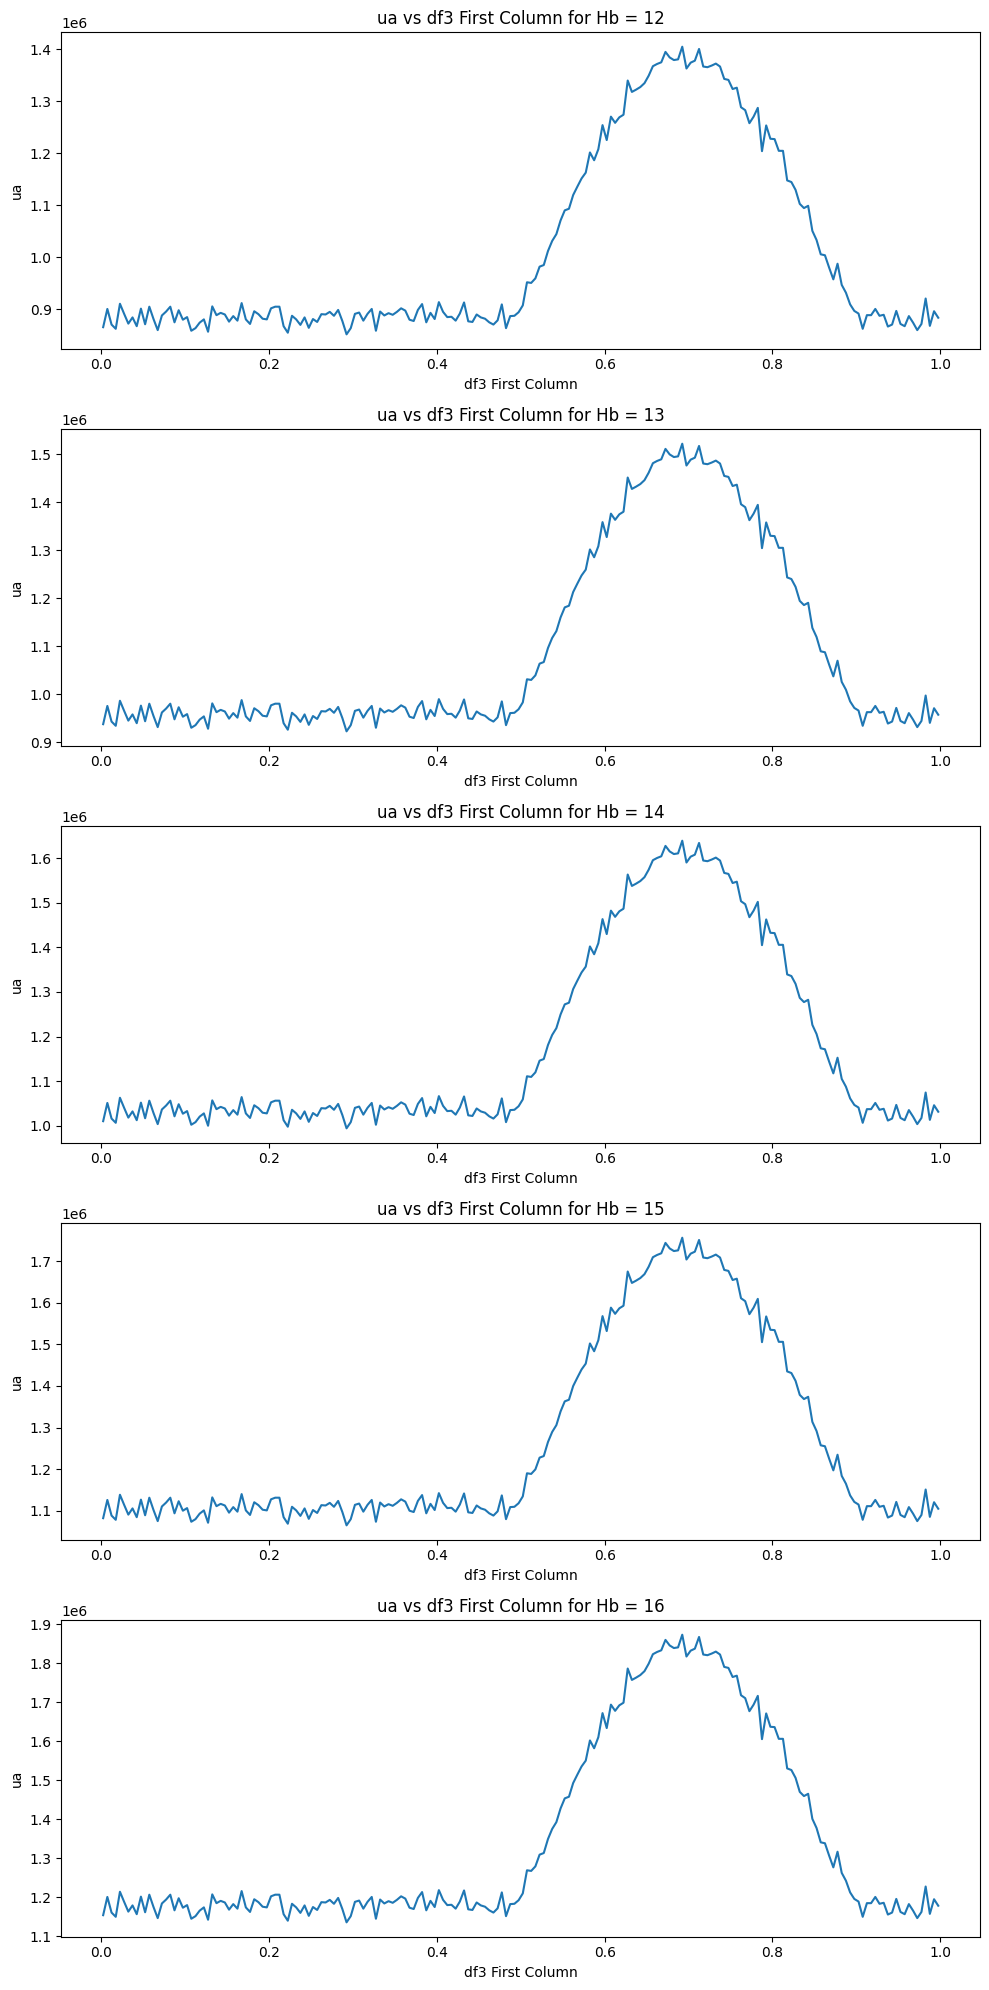

In [29]:
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

for i, hb in enumerate(Hb):
    Ratio_on_baseline = df3.iloc[:, 1]  # 获取 df3 的第二列
    ua = (E_HB + E_HBO2 * ratio) * hb * Ratio_on_baseline
    x_values = df3.iloc[:, 0]  # 获取 df3 的第一列
    
    axs[i].plot(x_values, ua)
    axs[i].set_title(f'ua vs df3 First Column for Hb = {hb}')
    axs[i].set_xlabel('df3 First Column')
    axs[i].set_ylabel('ua')

plt.tight_layout()
plt.show()
